In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('talk')

In [2]:
# Let us generate noisy data with a linear feature

# to make this notebook's output stable across runs
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 2 + 4 * X + np.random.randn(100, 1)

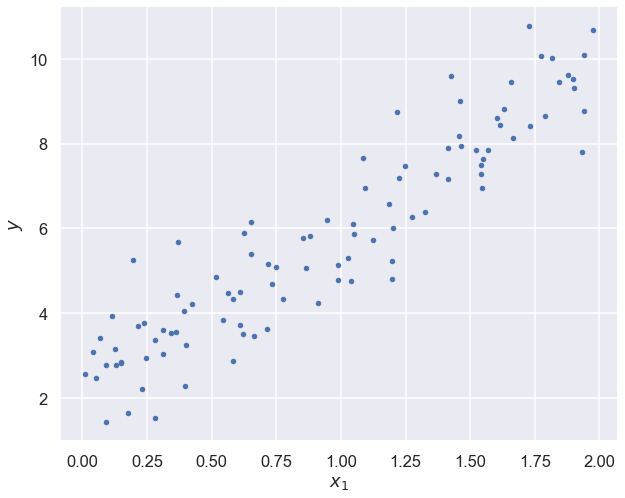

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y, "b.")
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$y$');

In [4]:
# Fit the linear regression model with sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the linear regression parameters (with a specified precision)
with np.printoptions(precision=4):
    print(lin_reg.intercept_, lin_reg.coef_)

[2.2151] [[3.7701]]


In [5]:
X_predict = np.array([[0], [2]])
y_predict = lin_reg.predict(X_predict)

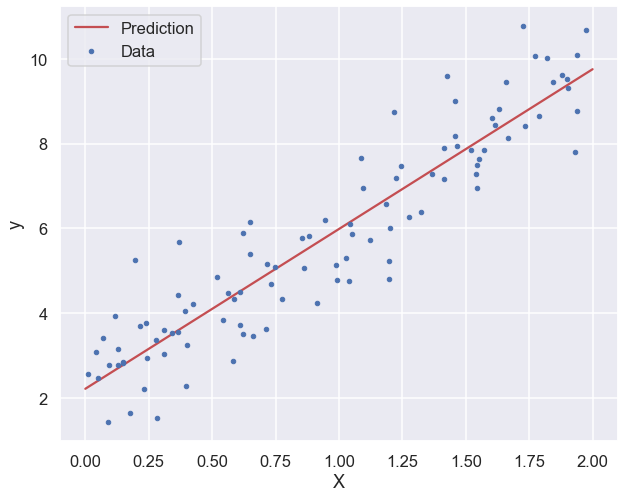

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_predict, y_predict, "r-",label="Prediction")
ax.plot(X, y, "b.",label="Data")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best');

In [7]:
m = len(X) # number of instances
# The design matrix will have shape (m x 2)
# It is created by adding X^0 = 1 to each instance
X_d = np.c_[np.ones((m, 1)), X]  

In [8]:
X_d.shape

(100, 2)

In [9]:
### EXERCISE
#
# (a) Use the normal equation to compute the fit parameters
# (b) Print the best fit parameters
# (c) Plot the fitted linear model together with the data
#
#
#

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_d, y, rcond=1e-6)
theta_best_svd

array([[2.21509616],
       [3.77011339]])

In [11]:
np.linalg.pinv(X_d).dot(y)

array([[2.21509616],
       [3.77011339]])

In [12]:
# learning hyperparameter
eta = 0.1
# number of iterations
n_iterations = 1000
m = len(X)
# initial guess for parameter vector
theta = np.random.randn(2,1)

In [13]:
for iteration in range(n_iterations):
    gradients = 2/m * X_d.T.dot(X_d.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
with np.printoptions(precision=4):
    print(theta)

[[2.2151]
 [3.7701]]


In [15]:
X_predict = np.array([[0], [2]])
X_predict_d = np.c_[np.ones((2, 1)), X_predict]  
X_predict_d.dot(theta)

array([[2.21509616],
       [9.75532293]])

In [16]:
# EXERCISE
#
#
# Explore the learning rates with different learning hyperparameter 
# eta = 0.02, 0.1, 0.5
#
# Plot the different learning rates using the `plot_gradient_descent` function defined above.

In [17]:
def plot_gradient_descent(theta, X, y, eta=0.1, theta_path=None,ax=None,n_iterations=1000):
    '''Plot the iterations of batch gradient descent.'''
    m = len(X)
    if not ax:
        fig,ax = plt.subplots(1,1)
    ax.plot(X, y, "b.")
    
    _X_d = np.c_[np.ones((m, 1)), X]  
    _X_predict = np.array([np.floor(min(X)),np.ceil(max(X))])
    _X_predict_d = np.c_[np.ones((2, 1)), X_predict]
    
    for iteration in range(n_iterations):
        if iteration < 10:
            _y_predict = _X_predict_d.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(_X_predict, _y_predict, style)
        gradients = 2/m * _X_d.T.dot(_X_d.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    ax.set_xlabel("$x_1$")
    ax.set_title(r"$\eta = {}$ (10 iter.)".format(eta))

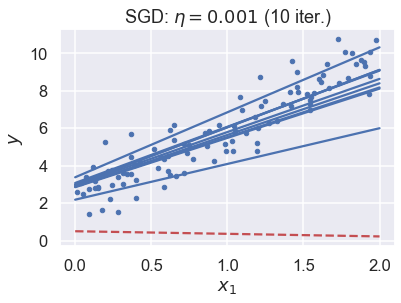

In [18]:
m = len(X)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

# We will store the iterations in a list to monitor the convergence
theta_path_sgd = []

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

fig,ax = plt.subplots(1,1)

for epoch in range(n_epochs):
    random_indices=np.arange(m)
    # shuffle the order of indices randomly
    np.random.shuffle(random_indices)
    for i in range(m):
        if epoch == 0 and i < 10:                    
            y_predict = X_predict_d.dot(theta) 
            style = "b-" if i > 0 else "r--" 
            ax.plot(X_predict, y_predict, style) 
        # pick a random instance
        random_index = random_indices[i]
        xi = X_d[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)    

ax.plot(X, y, "b.")           
ax.set_xlabel("$x_1$")           
ax.set_ylabel("$y$")
ax.set_title(f"SGD: $\eta = {eta:.3f}$ (10 iter.)");

In [19]:
theta

array([[2.21456514],
       [3.76831191]])

In [20]:
# The Stochastic Gradient Descent optimizer is built-in scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.16782317]), array([3.7260286]))

In [22]:
import numpy as np

In [23]:
# Let us generate some cubic data
m = 100
minX = -3
maxX = 3
np.random.seed(1)
X = (maxX-minX) * np.random.rand(m, 1) + minX
# up to cubic features, plus random noise
theta_true = np.array([2, 1, 0.5, -0.25])
eps_noise = 1.
y = eps_noise * np.random.randn(m, 1)
for order in range(len(theta_true)):
    y += theta_true[order] * X**order

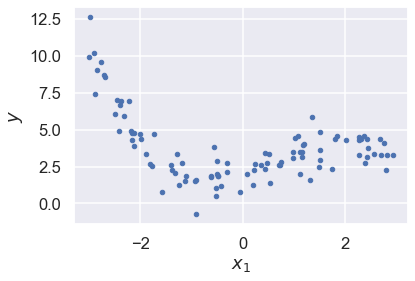

In [24]:
# Plot the data. It is pretty tricky to see the features
fig,ax = plt.subplots(1,1)

ax.plot(X, y, "b.")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$");

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
# Note that the first element of the instance vector is
X[0]

array([-0.49786797])

In [27]:
# while the first element of the design matrix is
# NOTE that we have excluded the bias term (x^0). 
# This term will later be added in the linear regression
X_poly[0]

array([-0.49786797,  0.24787252, -0.12340779])

In [28]:
# perform the fit
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# note the bias term, which is the attribute `intercept_` from the fit
lin_reg.intercept_, lin_reg.coef_

(array([1.96984865]), array([[ 1.02594731,  0.53415279, -0.26334408]]))

In [29]:
# EXERCISE
#
# Compare to the "known" amplitudes of the different features. Why doesn't the fit parameters agree better?
#
#
#

In [30]:
# Make predictions with the linear regression model on a linear grid of new points
# The PolynomialFeatures.transfom method is useful for preparing the new data for a prediction,
# but it is picky with the shape of the input vector.
X_new=np.linspace(minX, maxX, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

In [31]:
# EXERCISE
#
# Plot the data and the prediction
#
#

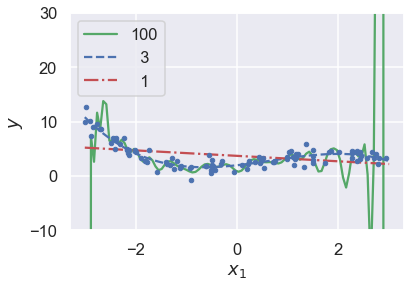

In [32]:
# For these fits we will employ scaling of the data
# We use the built-in StandardScaler to rescale the data to zero mean and unit variance.
# This will make the fit more stable
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fig,ax = plt.subplots(1,1)

for style, degree in (("g-", 100), ("b--", 3), ("r-.", 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    # Here we use a Pipeline that assembles several steps that we
    # previously applied sequentially:
    # 1. The data is transformed to the chosen polynomial features.
    # 2. The data is transformed to mean=0 and variance=1 (usually makes it numerically more stable)
    # 3. Perform the linear regression fit
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    ax.plot(X_new, y_newbig, style, label=f'{degree:>3}')


ax.plot(X, y, "b.")
ax.legend(loc="best")
ax.set_xlabel("$x_1$")
ax.set_ylim([-10,30])
ax.set_ylabel("$y$");

In [33]:
# EXERCISE
#
# Which of these models would you label as **overfitting** and which one as **underfitting** the data?

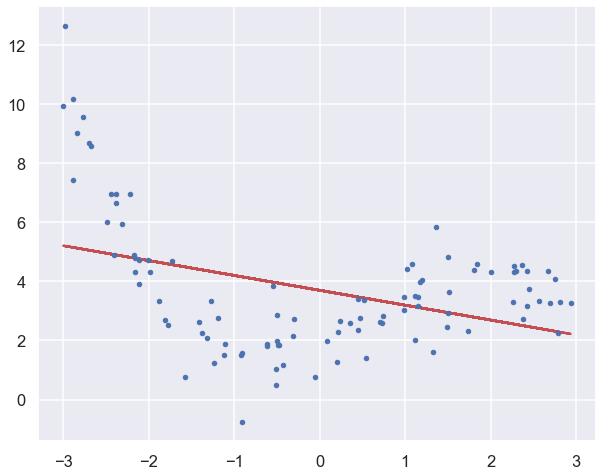

In [34]:
# EXERCISE
#
# Before moving on, let us first make sure to understand the mean_squared_error metric.
# Perform the training of a first-order polynomial model to the cubic data that we just generated.

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y_predict, "r-",label="Prediction")
ax.plot(X, y, "b.",label="Data");

In [35]:
# EXERCISE
#
# Write your own function that evaluates the mean-squared-error metric on the training set. 

In [36]:
# EXERCISE
#
# Then import the built-in convenience function from sckikit-learn for computing the MSE metric
from sklearn.metrics import mean_squared_error
# and use it to compute the same metric. The numbers should agree.

In [37]:
# built-in convenience function for computing the MSE metric
from sklearn.metrics import mean_squared_error
# built-in convenience function for splitting data
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, ax=None):
    # split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    if not ax:
        fig,ax = plt.subplots(1,1)
    ax.plot(np.sqrt(train_errors), "r-+", label="train")
    ax.plot(np.sqrt(val_errors), "b-", label="validation")
    ax.legend(loc="best")
    ax.set_xlabel("Training set size")
    ax.set_ylabel("MSE")

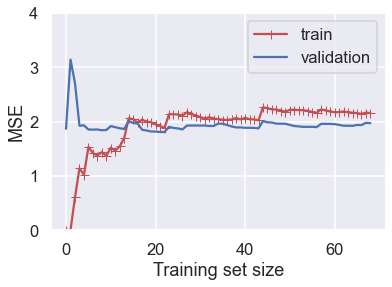

In [38]:
lin_reg = LinearRegression()
fig,ax = plt.subplots(1,1)
plot_learning_curves(lin_reg, X, y, ax=ax)
ax.set_ylim([0,4]);

In [39]:
# EXERCISE
#
# This features in a learning curve are typical for a model that underfits. 
# Can you explain / understand why that is?

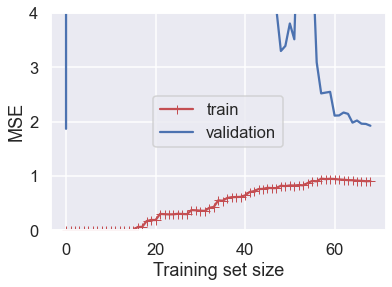

In [40]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

fig,ax = plt.subplots(1,1)
plot_learning_curves(polynomial_regression, X, y, ax=ax)
ax.set_ylim([0,4]);

In [41]:
from sklearn.linear_model import Ridge

In [42]:
# Let's generate some noisy data with a linear feature.
np.random.seed(1)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + 0.5 * np.random.randn(m, 1) 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [43]:
def train_ridge_model(X_train, y_train, alpha, X_predict=None, degree=1, **model_kargs):
    model = Ridge(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", model),
        ])
    model.fit(X_train, y_train)
    if not len(X_predict):
        X_predict=X_train
    return model.predict(X_predict)

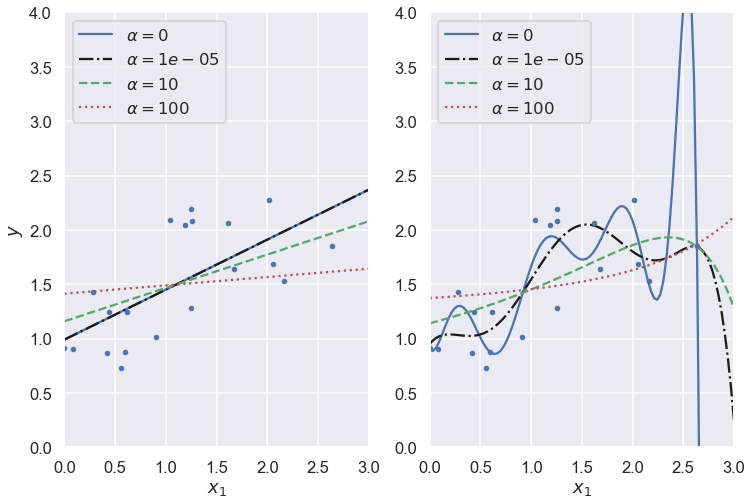

In [44]:
fig,axs = plt.subplots(1,2,figsize=(12,8))

alphas=(0, 1e-5,10, 100)
for i,degree in enumerate((1,10)):
    ax = axs[i]
    for alpha, style in zip(alphas, ("b-", "k-.", "g--", "r:")):
        y_new_regul = train_ridge_model(X, y, alpha, X_predict=X_new, degree=degree, random_state=42)
        ax.plot(X_new, y_new_regul, style, label=r'$\alpha={}$'.format(alpha))
    ax.plot(X, y, "b.")
    ax.legend(loc="upper left")
    ax.set_xlabel("$x_1$")
    ax.axis([0, 3, 0, 4])

axs[0].set_ylabel("$y$");